<img src="media/coco-banner.jpg">

# Rasterio

[Rasterio](https://rasterio.readthedocs.io/en/latest/) is a popular python library used to import and manipulate different types of raster files. When _rasters_ are imported into python using _Rasterio_, it is imported as a Nnumpy 2D array. `Rasterio` works with [GDAL](https://gdal.org/) dependencies to be able to read in different types of raster data. We will be working with an image and manipulate it a bit for today's class. 

---

[Rasterio](https://rasterio.readthedocs.io/en/latest/) es una libreria de python que se utiliza para importar y manipular diferentes tipos de archivos raster. Cuando se importan _archivos rasters_ a python usando _Rasterio_, se importan como un `numpy.array` de dimensión 2. Rasterio trabaja con dependencias [GDAL](https://gdal.org/) para poder leer en diferentes tipos de datos raster. Trabajaremos con una imagen y la manipularemos un poco para la clase de hoy.

We will learn how to: | Aprenderemos a:
* import a raster file | importar un archivo raster
* manipulate the data | manipular los datos
* visualize the data | visualizar los datos
* export data with geographic information | exportar datos con información geográfica


Let's start by importing some elevation data. | Comencemos importando algunos datos de elevación. 

## Import libraries | Importamos las librerías

In [1]:
from pathlib import Path
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

We use `Pathlib` to generate the file's path: | Usamos `Pathlib` para general el path (la ruta) al archivo:


In [2]:
US_DEM = Path(".") / "data" / "30n120w_20101117_gmted_mea300.tif"

This DEM was downloaded from the [USGS EarthExplorer](https://earthexplorer.usgs.gov/). Now, let's read in the data with rasterio! We can use rasterio to read in the `tif` file to see what type of data we have available.

---

Este archivo fue descargado usando el [USGS EarthExplorer](https://earthexplorer.usgs.gov/). ¡Ahora, vamos a leer los datos con rasterio! Podemos usar rasterio para leer en el archivo `tif` para ver qué tipo de datos tenemos disponibles.

In [6]:
# Open the file | Abrimos el archivo

dataset = rio.open(US_DEM) #let's see what's in this dataset

**Important commands | comandos importantes**

Here's a few commands you should know when working with rasterio: | Aquí hay algunos comandos que debe saber al trabajar con rasterio:
* `file.count` - provides the number of bands in the dataset | mirar el número de bandas en el conjunto de datos
* `file.shape` - returns the shape of the raster file | devuelve la forma del archivo raster
* `file.bounds` - bounding box for the dataset | cuadro delimitador para el conjunto de datos
* `file.transform` - provides an affine transformation matrix (this will be important when saving a raster) | proporciona una matriz de transformación afín (esto será importante al guardar un ráster)
* `file.crs` - provides the coordinate reference system of the dataset | proporciona el sistema de referencia de coordenadas del conjunto de datos

Let's look at these commands! | ¡Veamos estos comandos!

In [7]:
print(dataset)

<open DatasetReader name='data/30n120w_20101117_gmted_mea300.tif' mode='r'>


In [8]:
# Provides number of bands | Proporciona número de bandas
print(dataset.count) 

1


In [6]:
# Shape of dataset | Forma del conjunto de datos
print(dataset.shape) 

(2400, 3600)


In [9]:
# Bounding box of dataset | Límites del dataset
print(dataset.bounds) 

BoundingBox(left=-120.00013888888888, bottom=29.99986111111111, right=-90.00013888888888, top=49.99986111111111)


In [10]:
# Affine transformation matrix. | Matriz afín de transformación
print(dataset.transform)  

| 0.01, 0.00,-120.00|
| 0.00,-0.01, 50.00|
| 0.00, 0.00, 1.00|


In [9]:
print(dataset.crs)

EPSG:4326


## Let's start exploring the dataset! | Exploremos el dataset

We can change the value based on what band you want to read | Podemos cambiar el valor según la banda que desee leer:

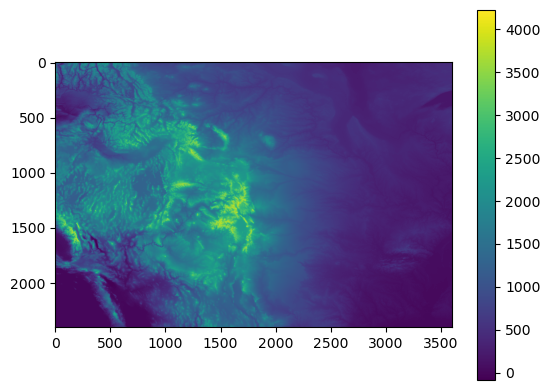

In [11]:
# In this case, we are plotting the band 1 | En este caso estamos graficando la banda 1

band1 = dataset.read(1) 

plt.imshow(band1)
plt.colorbar()

### Formative Assessment 1
What do you think will be the datatype for the variable named "band1"?
* raster
* float
* integer
* array

---

¿Cuál cree que será el tipo de datos para la variable llamada "band1"?
* raster
* float
* integer
* array

In [11]:
### check the datatype here! 


Using _Nnumpy_, we can work with the data and save our new raster. First, let's zoom in to the point with the highest elevations on the map. 

---

Usando _Numpy_, podemos trabajar con los datos y guardar nuestro nuevo ráster. Primero, acerquemos el punto con las elevaciones más altas en el mapa.

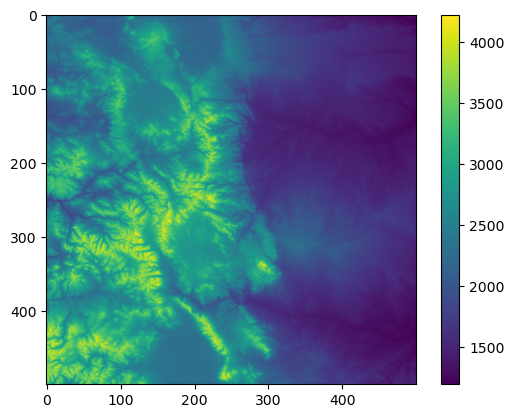

In [15]:
zoom = band1[1000:1500, 1500:2000]

plt.imshow(zoom)
plt.colorbar()

## Practice exercise: (5 minutes)

Using the variable named band1, zoom in to a different region of the DEM. I will then pick on a few of you to share your screen and show us your zoomed in figure. 

---

Usando la variable nombrado band1, haga un zoom a una región diferente del DEM. Luego, elegiré a algunos de ustedes para compartir su pantalla y mostrarnos su figura ampliada.

In [16]:
### Practicalo aquí 


We can also mask areas of interest based on the values in the array. In the following example, we will be replacing values of interest with `nan` values to mask specific areas in our image that are associate with those values.

---

También podemos enmascarar áreas de interés según los valores del array. En el siguiente ejemplo, reemplazaremos valores de interés con valores `nan` para enmascarar áreas específicas en nuestra imagen que están asociadas con esos valores.

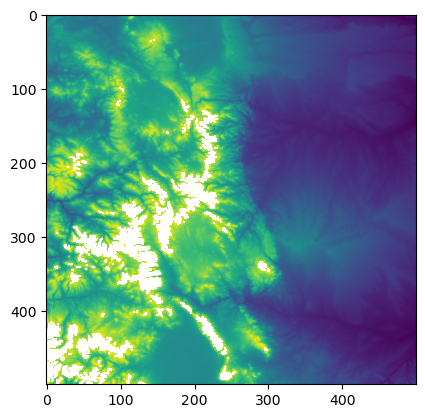

In [17]:
zoom = np.where(zoom > 3500, np.nan, zoom)

plt.imshow(zoom)

## Windowed reads 

Sometimes we have very large raster datasets which makes it computationally expensive to read in. We can use the [windowed reads](https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html) function which only reads in part of the dataset!

---

A veces tenemos conjuntos de datos ráster muy grandes, lo que hace que la lectura sea computacionalmente costosa. Podemos utilizar la función [lecturas en ventana](https://rasterio.readthedocs.io/en/latest/topics/windowed-rw.html) que solo lee una parte del conjunto de datos.

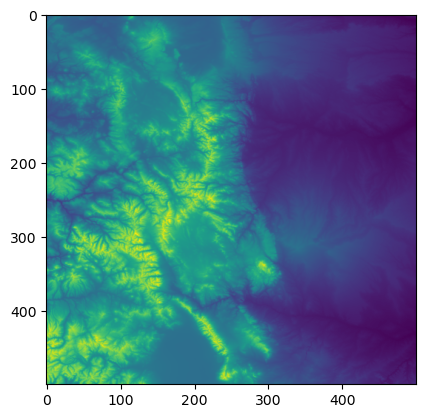

In [18]:
# First we need to import other module of Rasterio | Primero debemos inportar otro modulo de Rasterio
from rasterio.windows import Window

with rio.open(US_DEM) as src:
    w = src.read(1, window=Window(1500, 1000, 500, 500))
    plt.imshow(w)

Now let's save our manipulated and zoomed in raster file! | ¡Ahora guardemos nuestro archivo ráster manipulado y ampliado! 

**Note | Nota**

Because this raster is smaller than our original raster, we will need to change the affine matrix to account for this change. 

---

Debido a que este ráster es más pequeño que nuestro ráster original, necesitaremos cambiar la matriz afín para tener en cuenta este cambio.

In [19]:
w = rio.windows.Window.from_slices(slice(1000,1500), slice(1500,2000))
win_transform = dataset.window_transform(w)
win_transform

with rio.open(
    'data/new.tif',
    'w',
    driver='GTiff',
    height=zoom.shape[0],
    width=zoom.shape[1],
    count=1,
    dtype=zoom.dtype,
    crs='EPSG:4326',
    transform=win_transform,
) as dst:
    dst.write(zoom, 1)


We open the saved raster: | Abrimos el raster que guardamos anteriormente:

In [20]:
OurData = Path(".") / "data" / "new.tif"

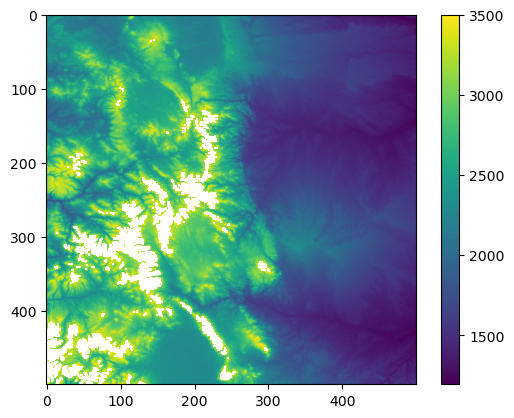

In [21]:
test = rio.open(OurData)
newBand = test.read(1)

plt.imshow(newBand)
plt.colorbar()

# Xarray

[Xarray](https://docs.xarray.dev/) is a Python package that makes working with labelled multi-dimensional arrays (like stacks of images) in Python simple, efficient, and fun. It has extensions for specific domains, for example the [Rioxarray](https://corteva.github.io/rioxarray) adds functionality for geospatial raster data. The name "RIO" comes from "RasterIO"(Input/Output), because the extension makes use of yet another great open source package [RasterIO](https://rasterio.readthedocs.io).   

---

[Xarray](https://docs.xarray.dev/) hace que trabajar con datos n-dimensionales (conjuntos de imagenes) sea sencillo, eficaz, y divertido! Tiene extenciones para varios dominios cientificos, por ejemplo [Rioxarray](https://corteva.github.io/rioxarray) aggrega funciones para trabajar con datos cuadriculares geospaciales (imagenes de satellite) comun en geociencias. El nombre 'RIO' viene de "RasterIO" (IO = Input/Output), porque la extencion utiliza otro paquete libre en Python: [RasterIO](https://rasterio.readthedocs.io).

We will learn about: | Vamos a aprender:
* How to open a satellite image | Abrir imagenes satelitales ([Landsat Collection 2](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2))
* How to extract quantitative data from geospatial coordinates | Extraer datos cuantativos segun coordenates geospaciales
* How to make different plots | Crear graficas analyticas
* How to save an image for GIS software like [QGIS](https://www.qgis.org/) | Guardar un imagen para otro software como [QGIS](https://www.qgis.org/)
* How to scale analysis with *lots* of images using [Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/) | Empezar a analysis conjuntos de imagenes con [Microsoft's Planetary Computer](https://planetarycomputer.microsoft.com/)

![Xarray Diagram](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

## Import Xarray | Importar Xarrray

In [22]:
import xarray as xr

### How to read data? | ¿Cómo abrir datos?

### DataArray

A _DataArray_ is a N-dimensional data structure. Commonly with geospatial data we have a cube with 3 dimensions: _x, y, time_. But you could add even more dimensions like 'depth', 'band', 'polarization', 'experiment number',  etc. Xarray provides nice HTML-representations of it's data objects when you're using a Jupyter Notebook:
 
---

_DataArray_ es una representación de datos estructurada con N-dimeniones. Frecuentemente en geosiencia tenemos 3 dimensiones: _x, y, tiempo_. Pero puede haber más dimensiones: 'profundidad', 'banda', 'polarizacion', etc. _Xarray_ te demuestra una representación gráfica de este objetó:

In [35]:
# Using the raster file we have been working with, we will quickly open it with `xarray`: 
# Abrimos el raster que utilizamos anteriormente con `xarray`: 
dataset_dem = xr.open_dataarray(
    US_DEM, 
    engine='rasterio',
)

dataset_dem

<xarray.DataArray 'band_data' (band: 1, y: 2400, x: 3600)>
[8640000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -120.0 -120.0 -120.0 -120.0 ... -90.02 -90.01 -90.0
  * y            (y) float64 50.0 49.99 49.98 49.97 ... 30.03 30.02 30.01 30.0
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Area

We must specifiy `engine='rasterio'` to use the `RioXarray` extension, which recognizes file formats like [Geotiff (.tif)](https://gdal.org/drivers/raster/index.html). Note the returned data object is a 3-dimensional `DataArray` (_band_, _y_, _x_).

---

Usamos `engine='rasterio'` para utilizar la extension `RioXarray`, la cual tiene funciones para leer formatos geospaciales. Notemos que lo que obtenemos en un `DataArray` de 2 dimensiones (_band_, _y_, _x_). 

In [23]:
data_array = xr.open_dataarray(
    './data/LC08_L2SP_046027_20210725_20210803_02_T1_SR_B5_OV2.tif', 
    engine='rasterio',
)

data_array

<xarray.DataArray 'band_data' (band: 1, y: 987, x: 972)>
[959364 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 4.735e+05 4.737e+05 ... 7.062e+05 7.064e+05
  * y            (y) float64 5.373e+06 5.373e+06 ... 5.137e+06 5.137e+06
    spatial_ref  int64 ...
Attributes:
    AREA_OR_POINT:  Point

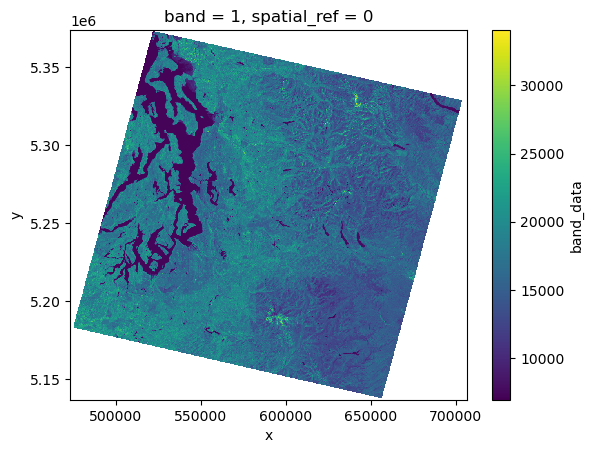

In [24]:
data_array.plot();

The `spatial_ref` coordinate has Coordinate Reference System (CRS) Information. This dataset is 'Universal Tranverse Mercator (UTM)'. _Rioxarray_ has methods that can be accessed via the `.rio` attribute, for example to display the CRS (https://epsg.io/32610)

---

La coordenada `spatial_ref` tiene información del sistema de referencia de coordenadas (CRS). Este conjunto de datos es 'Universal Tranverse Mercator (UTM)'. _Rioxarray_ tiene métodos a los que se puede acceder a través del atributo `.rio`, por ejemplo, para mostrar el CRS (https://epsg.io/32610)

In [25]:
data_array.rio.crs

CRS.from_epsg(32610)

In [26]:
data_array.rio.resolution() #Units?

(239.84567901234567, -239.84802431610942)

We can change the coordinate projection to longitude and latitude: | Podemos cambiar la proyección de las coordenadas a longitud y latitud:

In [27]:
data_array_LL = data_array.rio.reproject('EPSG:4326')

data_array_LL

<xarray.DataArray 'band_data' (band: 1, y: 802, x: 1171)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * x            (x) float64 -123.4 -123.4 -123.4 ... -120.2 -120.2 -120.2
  * y            (y) float64 48.51 48.51 48.51 48.51 ... 46.36 46.36 46.36 46.36
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point

**Note | Nota**

The dimensions have the same names ('x','y'). But now the coordinate *values* are 'longitude', 'latitude' instead of 'easting' and 'northing'. Also, because we've reprojected the original data onto a new grid, the total size of the array has changed from (987, 972) to (802, 1171).

---

Las dimensiones tienen los mismos nombres ('x', 'y'). Pero ahora los valores de las coordenadas son 'longitud', 'latitud' en lugar de 'este' y 'norte'. Además, debido a que reproyectamos los datos originales en una nueva cuadrícula, el tamaño total de la matriz cambió de (987, 972) a (802, 1171).

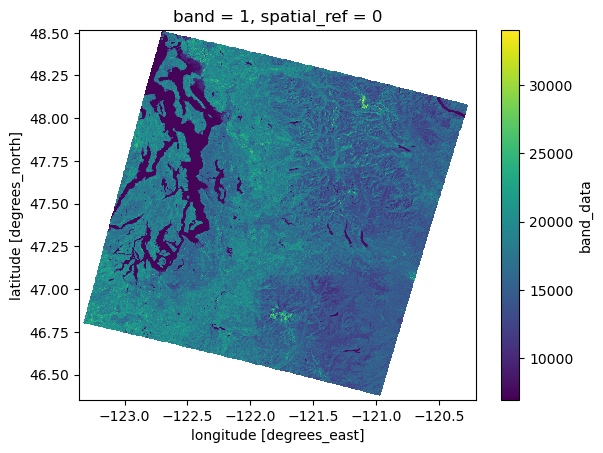

In [29]:
data_array_LL.plot()

### Sampling | Muestreo de los datos

_Xarray_ uses sampling based on either real-world coordinates values using `.sel` or row/col index with `.isel`. This is similar to Pandas: `loc` or `.iloc`.

---

_Xarray_ puede mostrar los valores a través de los valores que tiene las coordenadas con el método `.sel` o por medio de los índices de las filas y columnas usando `.isel`. Esto es similar a _Pandas_ con `.loc` y `iloc` 

In [30]:
data_array_LL.sel(y=47.0, x=-122.0, method='nearest') # Return a DataArray

<xarray.DataArray 'band_data' (band: 1)>
array([17740.], dtype=float32)
Coordinates:
    x            float64 -122.0
    y            float64 47.0
  * band         (band) int64 1
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Point

In [31]:
data_array_LL.sel(y=47.0, x=-122.0, method='nearest').data # Return a numpy Array

array([17740.], dtype=float32)

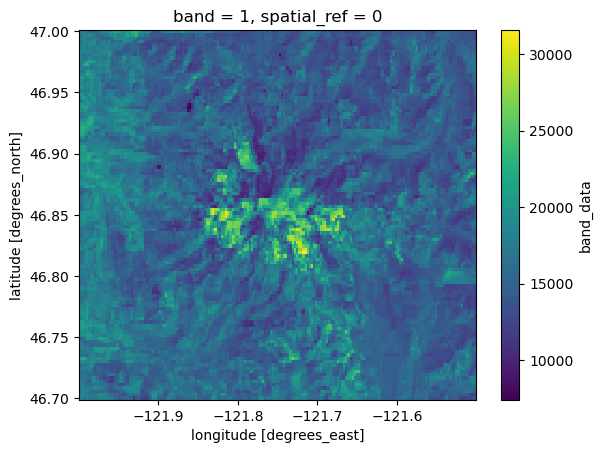

In [ ]:
# Zoom in on Mt Rainier
data_array_LL.sel(y=slice(47.0, 46.7), x=slice(-122.0, -121.5)).plot()

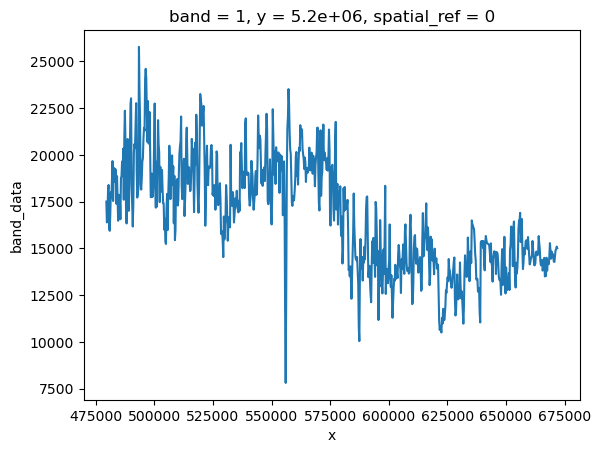

In [47]:
# Extract a profile (best in UTM for x-axis in meters)
data_array.sel(y=5.2e6, method='nearest').plot()

### Save a copy | Guardar archivo

Let's say we want to save a copy of our cropped image to use later or in a different program like QGIS, Rioxarray allows us to write to various formats. Geotiff is the default:

---

Si queremos guardar una copia de la imagen cortado para usar luego o abrir en software different como QGIS, Rioxarray nos permite escribe formatos diferentes. Geotiff por defecto:

In [ ]:
daCrop = daLL.sel(y=slice(47.0, 46.7), x=slice(-122.0, -121.5))
daCrop.rio.to_raster('mt_rainier.tif')

In [ ]:
xr.open_dataarray('mt_rainier.tif', engine='rasterio').plot();

### Open again the DEM data | Abrimos otra vez el DEM

With `Xarray`, we can use the same workflow that we saw before: | Con `Xarray` podemos usar el mismo flujo de trabajo que vimos antes:

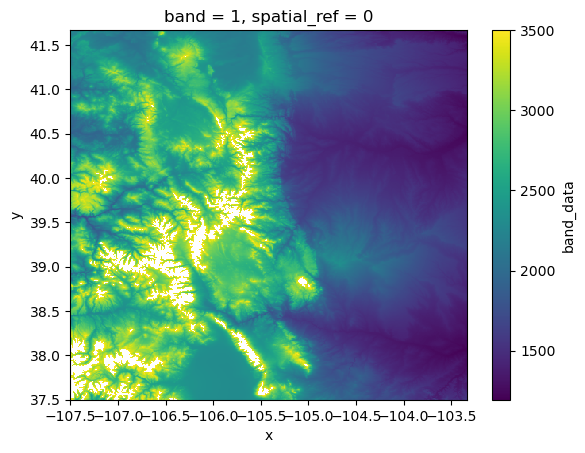

In [48]:
dataset_dem = xr.open_dataarray(US_DEM, engine='rasterio')

# We make a zoom using the indexing method | Hacemos un zoom usando in método de indexación
zoom = dataset_dem.isel(y=slice(1000,1500), x=slice(1500,2000))

# We only keep with the elevation higher than 3500 using the `where` method 
# Solo nos quedamos con las elevaciones mayores a 3500 usando el metodo `where`
zoom = zoom.where(zoom <= 3500) 

# Plot | Graficamos
zoom.plot()

# Save it as tif file | Lo guardamos como un archivo tif
zoom.rio.to_raster('zoomed.tif')

## Homework

#### Reading
Please read through the planetary computer [ documentation ](https://planetarycomputer.microsoft.com/docs/overview/about/) and look through this [ tutorial ](https://planetarycomputer.microsoft.com/docs/overview/explorer/) to explore different datasets.

#### Practice
Please make an account to explore the [ planetary computer ](https://planetarycomputer.microsoft.com/account/request). After creating an account, download data of your choice that you can read in to python, using Rasterio / Xarray. Manipulate the data with numpy and save the imagery as a GeoTiff. I'm excited to see what you come up with! 

---
## Tarea

#### Lectura
Lea la [ documentación ] (https://planetarycomputer.microsoft.com/docs/overview/about/) de el planetary computer y mire este [ tutorial ] (https://planetarycomputer.microsoft.com/docs/overview/explorer /) para explorar diferentes clases de datos.

#### Práctica
Cree una cuenta para explorar el [ planetary computer ](https://planetarycomputer.microsoft.com/account/request). Después de crear una cuenta, descargue los datos de su elección que pueda leer en python, usando Rasterio/Xarray. Manipule los datos con numpy y guarde las imágenes como GeoTiff. ¡Estoy emocionado de ver lo que se te ocurre!
